# <center><u>Subscribe Term Deposite Prediction Modeling</u></center>

### Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
### File Name: 
bank-direct-marketing-campaign.csv
### Objective:
Our objective is to dive into and analyse the data and predict the likelihood if the client will subscribe (yes/no) a term deposit (variable y).
### Analysis By:
Soumalya Biswas (Group-3)

# =============================================================

### Importing the necessary libraries to analyse data

In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train-Test data spliting library
from sklearn.model_selection import train_test_split
# Logistic Regression library
from sklearn.linear_model import LogisticRegression
# Calculate accuracy measures and confusion matrix
from sklearn import metrics
# Naive Bayes library
from sklearn.naive_bayes import GaussianNB
# KNN Classifier library
from sklearn.neighbors import KNeighborsClassifier
# Preprocessing library
from sklearn import preprocessing
# KFold library
from sklearn.model_selection import KFold
# Cross Validation library
from sklearn.model_selection import cross_val_score
# Decision Tree Classifier library
from sklearn.tree import DecisionTreeClassifier
# Support Vector Machine Classifier library
from sklearn.svm import SVC
# Bagging Classifier library
from sklearn.ensemble import BaggingClassifier
# Adaptive Boosting Classifier library
from sklearn.ensemble import AdaBoostClassifier
# RandomForest Classifier library
from sklearn.ensemble import RandomForestClassifier
# Voting Classifier library
from sklearn.ensemble import VotingClassifier
# GradientBoosting Classifier library
from sklearn.ensemble import GradientBoostingClassifier

<b>Comment:</b> 
* Importing the pandas library to access the dataframe.
* For graphical representation I used seaborn and matplotlib.
* Numpy library used to calculate and access array
* For spliting data used `train_test_split` function from `model_selection` library of `sklearn`
* For logistic regression using `LogisticRegression` function of `sklearn` `linear_model` library
* Using `metrics` function of `sklearn` for accuracy and confusion matrix measurements
* For Naive-Bayes model using `GaussianNB` function of `sklearn` `naive_bayes` library
* For KNN model using `KNeighborsClassifier` function of `sklearn` `neighbors` library
* For scaling the data using `preprocessing` library of `sklearn`
* For DecisionTree model using `DecisionTreeClassifier` function of `sklearn` `tree` library
* For support vactor model using `SVC` function of `sklearn` `svm` library
* For Ensemble Learning the data using `GradientBoostingClassifier`,`VotingClassifier`,`RandomForestClassifier`,`AdaBoostClassifier`,`BaggingClassifier` library of `ensemble`

### Reading the data as a data frame

In [38]:
bank_df = pd.read_csv('bank-direct-marketing-campaign.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<b>Comment:</b> Read the data from bank-direct-marketing-campaign.csv file using pandas function called read_csv and stored the dataframe in variable named bank_df. Also displayed the first 5 row of the data from dataframe using head function.

### Understanding of Data Attributes
  Checked the dataset separately with excel editor. Added filter in each column to understand the nature of the data.
  
<b><u>Interval Vriables :</u></b>
  * <b>age : </b> The Age column represents the customer age. Min value is 18 and max value is 95 here. 
  * <b>balance : </b> This is average yearly balance, in euros (numeric).
  * <b>day : </b> This is the last contact day of the month (value is numeric andit belongs to 1-31).
  * <b>duration : </b> This is the last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 
  * <b>campaign : </b> The campaign attributes are the number of contacts performed during this campaign and for a particular client (this is numeric data including last contact). 
  * <b>pdays : </b> The pdays is the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).
  * <b>previous : </b> This attributes informs us the number of contacts performed before this campaign and for this client (numeric). 
  
<b><u>Ordinal Categorical Variables :</u></b>
  * <b>job : </b> This is the type of the job a customer doing. It's a categorical variable with 'admin.','blue-collar','entrepreneur','housemaid','manage ment','retired','self-employed','services','student','technicia n','unemployed','unknown' values. 
  * <b>marital : </b> This is marital status of the customer. It has the values 'divorced','married', 'single'.
  * <b>education : </b> This is the education level of the customer. It has 3 levels. 1: primary; 2: secondary; 3: tertiary, -1: unknown.
  * <b>contact : </b> This is the mode of contact in which type of communication number (callular, telephone) the customer has been contacted.
  * <b>month : </b> This is the last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec').
  * <b>poutcome : </b> This is the outcome of the previous marketing campaign (categorical: 'failure','other','success', 'unknown').
  
<b><u>Binary Categorical Variables :</u></b>
  * <b>default : </b> Does the customer has credit in default? Catgories will be in ('no', 'yes', 'unknown')
  * <b>housing : </b> Does the customer has housing loan? I'll evaluate the impact on target column.
  * <b>loan : </b> Does the customer has personal loan? I'll evaluate the impact on target column.
  * <b>Target : </b> That's the value where it's showing whether customer subscribed to a term deposite. <b>This is the Target Value</b>

### Performing the basic EDA

* <b><u>Shape of the data</u></b>

In [39]:
rows, columns = bank_df.shape
print(f'There are {rows} rows and {columns} columns in the dataframe.')

There are 45211 rows and 17 columns in the dataframe.


* <b><u>Checking the length of the index of the data</u></b>

In [40]:
len(bank_df.index)

45211

<b>Comment:</b> Found the row size and the index sizes are equal which is 45211 in the dataset against the columns size 17.

* <b><u>Checking the data type of each attribute</u></b>

In [41]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [42]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

<b>Comment: </b> I can see out of 17 column there is 10 object values column and 7 Integer (Discrete Variable) value column available.
 * 10 Integer type (job, marital, education, default, housing, loan, contact, month, poutcome, Target)
 * 7 Integer type (age, balance, day, duration, campaign, pdays, previous) 

One fact I can notice that `contact` which is representing the communication mode to the customer which is very impacting out target variable very less.   

* <b><u>Checking the unique value</u></b>

In [43]:
bank_df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

<b>Comment : </b> For checking the unique value I used unique function of pandas and applied through the dataframe with the helpof lambda function.

 * `default` , `housing` , `loan` , `Target` are having 2 unique values. 
 * `job, marital, education, contact, month, poutcome` are having multiple categorical values.
 * Rest of the attributes are having sets of numbers.

* <b><u>Checking the presence of missing values</u></b>

In [44]:
bank_df.isnull().values.any()

False

In [45]:
bank_df.isna().values.any()

False

In [46]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [47]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<b>Comment:</b> I found there is no missing values in the dataframe. For that I used isnull and isna function of dataframe and there I checked if any isnull or isna values present or not. I found False return. And also checked the sum of null and sum of na values on each attribute which is 0 in our dataset.

Also for more evidence, if I look at the above info function output it's showing me all equal distribution of rows in between different data types. So, I can say there is no missing values in this dataset.

* <b><u>Key Characteristics of Numerical data</u></b>

In [48]:
five_points_summury = bank_df.describe().T
five_points_summury

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


* Mean and the median is almost same for the `age, day, campaign, previous` so we can say it is approximately normally distributed.
* `balance, duration` are having much values at the max portion, I can say it is skewed towards right side.
* `pdays` are having much values at the min portion, I can say it is skewed towards left side.

* <b><u>5 point summary of numerical attributes</u></b>

In [49]:
five_points_summury[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
age,18.0,33.0,39.0,48.0,95.0
balance,-8019.0,72.0,448.0,1428.0,102127.0
day,1.0,8.0,16.0,21.0,31.0
duration,0.0,103.0,180.0,319.0,4918.0
campaign,1.0,1.0,2.0,3.0,63.0
pdays,-1.0,-1.0,-1.0,-1.0,871.0
previous,0.0,0.0,0.0,0.0,275.0


<b>Comment:</b> I used describe function of dataframe to determine the 5 point summary of numerical attributes. Applied transpose to the result and stored in a variable called five_points_summury.

Here We can see the key characteristics of our numerical datas like mean, standard deviation  of attributes. 

Then I displayed the 5 point summury where some important insights I found like min and max values of numerical attributes which will help me in my next analysis.


<b>Important : </b> One noticable point here is the pdays value which is in negative. 

### Outlier Checking

Used seaborn boxplot function to observe and display the outliers

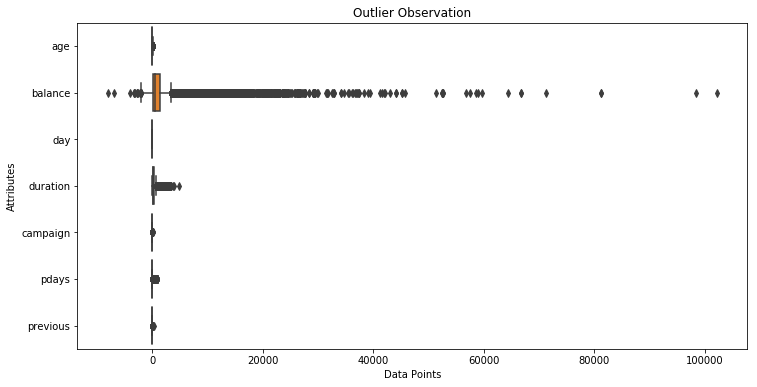

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(data=bank_df, orient='h')
plt.title('Outlier Observation')
plt.xlabel('Data Points')
plt.ylabel('Attributes')
plt.show()

<b>Comment: </b> From the above ploting I can say `balance` and `duration` column are having clear outliers. But few columns like `campaign`, `pdays`, `previous` are not clearly display whether those are having the outliers or not. Let see those separately.

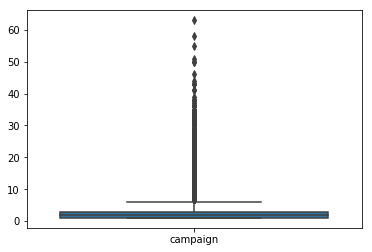

In [51]:
# Boxplot implementation for `campaign`
sns.boxplot(data=bank_df[['campaign']])
plt.show()

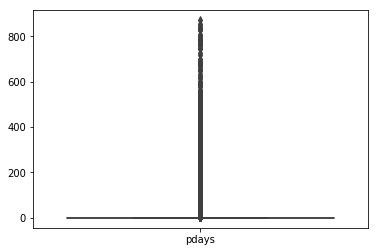

In [52]:
# Boxplot implementation for `pdays`
sns.boxplot(data=bank_df[['pdays']])
plt.show()

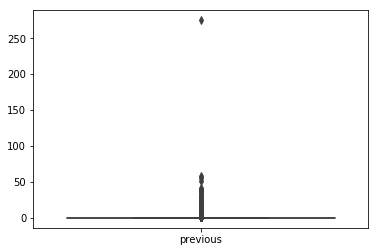

In [53]:
# Boxplot implementation for `previous`
sns.boxplot(data=bank_df[['previous']])
plt.show()

<b>Comment: </b>  Above three graph is the representation of `campaign`, `pdays`, `previous` column boxplot graph respectively. All of them are having clear outliers.

<u>From above individual box plot graph,</u><br>
 a. Bottom black horizontal line of box plot is minimum value.<br>
 b. First black horizontal line of rectangle shape of box plot is First quartile or 25%<br>
 c. Second black horizontal line of rectangle shape of box plot is Second quartile or 50% or median.<br>
 d. Third black horizontal line of rectangle shape of box plot is third quartile or 75%<br>
 e. Top black horizontal line of rectangle shape of box plot is maximum value.<br>
 f. Small diamond shape of box plot is <b>outlier data</b>.

### Datatype conversion

Now I'm going to change the datatype from object to category

In [54]:
# Loop through all columns in the dataframe
for feature in bank_df.columns:
    # Only apply for columns with categorical strings
    if bank_df[feature].dtype == 'object':
        # Replace strings with an integer
        bank_df[feature] = pd.Categorical(bank_df[feature])
bank_df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

All the object type changed to category.

#### Checking the unique values

In [55]:
print('------------ job ------------')
print(bank_df.job.value_counts())
print('-----------------------------')
print('------------ marital ------------')
print(bank_df.marital.value_counts())
print('-----------------------------')
print('------------ education ------------')
print(bank_df.education.value_counts())
print('-----------------------------')
print('------------ default ------------')
print(bank_df.default.value_counts())
print('-----------------------------')
print('------------ housing ------------')
print(bank_df.housing.value_counts())
print('-----------------------------')
print('------------ loan ------------')
print(bank_df.loan.value_counts())
print('-----------------------------')
print('------------ contact ------------')
print(bank_df.contact.value_counts())
print('-----------------------------')
print('------------ month ------------')
print(bank_df.month.value_counts())
print('-----------------------------')
print('------------ poutcome ------------')
print(bank_df.poutcome.value_counts())
print('-----------------------------')
print('------------ Target ------------')
print(bank_df.Target.value_counts())
print('-----------------------------')

------------ job ------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
-----------------------------
------------ marital ------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
-----------------------------
------------ education ------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
-----------------------------
------------ default ------------
no     44396
yes      815
Name: default, dtype: int64
-----------------------------
------------ housing ------------
yes    25130
no     20081
Name: housing, dtype: int64
-----------------------------
------------ loan ------------
no     37967
yes     7244
Name: loan, dtype: int64
----------------

#### Replacing the the string values of categorical variables

In [56]:
# excluding the contact attribute as it has less impact on target attribute.

replaceStruct = {
    "job":{"unknown": -1, "blue-collar": 1, "management":2, "technician":3, "admin.":4, "services":5, "retired":6, "self-employed":7, "entrepreneur":8, "unemployed":9, "housemaid": 10, "student": 11},
    "marital": {"married": 1, "single":2 , "divorced": 3},
    "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown": -1},
    "default":     {"no": 0, "yes": 1 },
    "housing":     {"no": 1, "yes": 2 },
    "loan":     {"no": 0, "yes": 1 },
    "contact":     {"cellular": 0, "telephone": 1, 'unknown': -1 },
    "month":     {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5 , "jun": 6 , "jul": 7 , "aug": 8 , "sep": 9 , "oct": 10 , "nov": 11 , "dec": 12 },
    "poutcome":     {"failure": 0, "succFaiess": 1, "other": 2, "unknown": -1 },
    "Target":     {"no": 0, "yes": 1 }
}

In [57]:
bank_df=bank_df.replace(replaceStruct)
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,3,0,2143,2,0,-1,5,5,261,1,-1,0,-1,0
1,44,3,2,2,0,29,2,0,-1,5,5,151,1,-1,0,-1,0
2,33,8,1,2,0,2,2,1,-1,5,5,76,1,-1,0,-1,0
3,47,1,1,-1,0,1506,2,0,-1,5,5,92,1,-1,0,-1,0
4,33,-1,2,-1,0,1,1,0,-1,5,5,198,1,-1,0,-1,0
5,35,2,1,3,0,231,2,0,-1,5,5,139,1,-1,0,-1,0
6,28,2,2,3,0,447,2,1,-1,5,5,217,1,-1,0,-1,0
7,42,8,3,3,1,2,2,0,-1,5,5,380,1,-1,0,-1,0
8,58,6,1,1,0,121,2,0,-1,5,5,50,1,-1,0,-1,0
9,43,3,2,2,0,593,2,0,-1,5,5,55,1,-1,0,-1,0


### Relation between Individual attributes

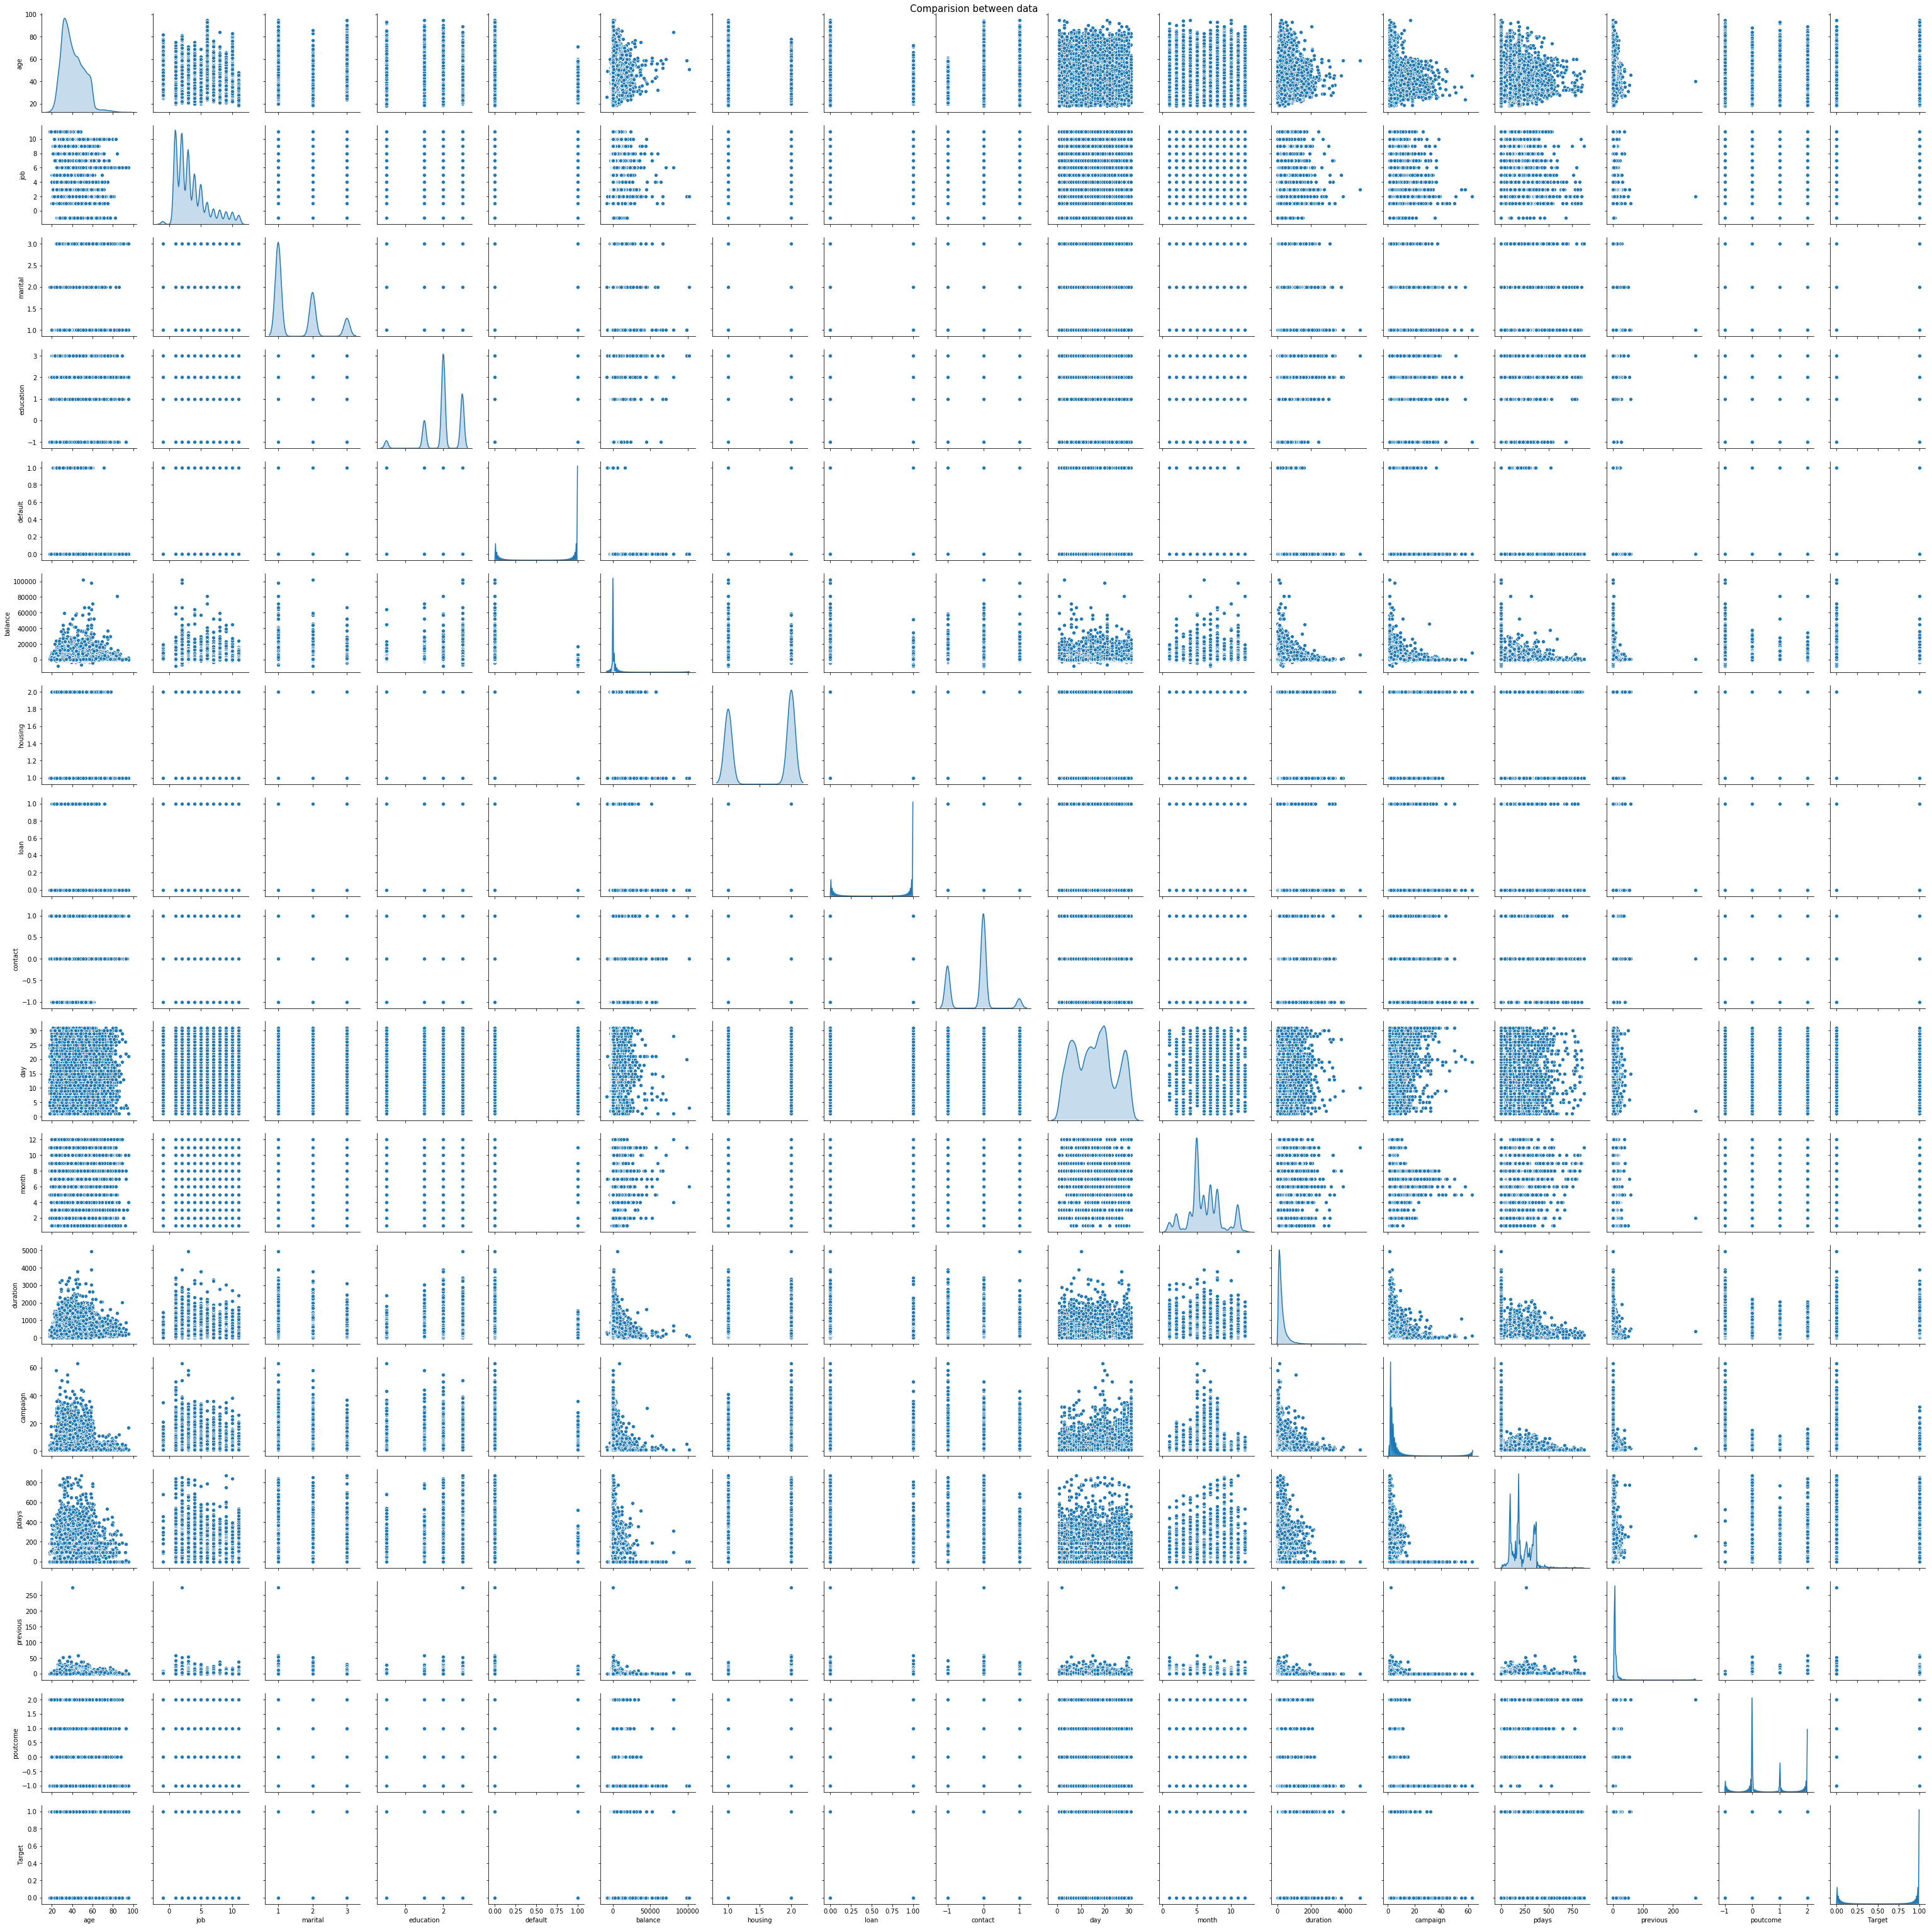

In [58]:
sns.pairplot(bank_df, diag_kind='kde')
plt.suptitle('Comparision between data', y=1,size=15)
plt.show()

<b> Comment: </b> I used seaborn pairplot function to check the relation between individual attributes.

<b> Few interesting facts: </b>
- 'Age' column is slightly right skewed. Most of the client age is between 25 to 65 years. 
- 'Job' Here the number of clients who have 'blue-collar','management' and 'technician' are more in ou dataset and it is skewed towards right.
- 'marital' from above we can see that married clients are more tend to subscribe for the term deposite.
- 'Education' clients with higher education are more and also there are many clients whose education level is unknown.
- 'Balance' there is a long tail towards right side in balance column which would be the outliers. 
- 'Housing' clients who dont have housing loan are more tend to subscrive for the term deposite..
- 'Duration' the skewed in the duration indicates that most of the calls are relatively short aslo large number of outliers presense in the dataset.
- 'Campaign' most of the clients have been contacted by the bank between 1 to 5 times. There are some clients who have been contacted by the bank more than 20 times and also we can see that their probability towards the term deposite is very low or alomost 0.  Higher subscriber rate when calls < 5.

#### Subscribe Term Deposite (Target Column)

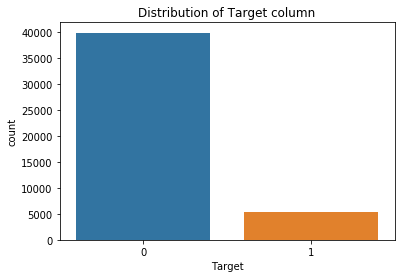

In [64]:
# Target Column distribution

sns.countplot(bank_df['Target'])
plt.title('Distribution of Target column')
plt.show()

<b> Comment: </b> I can clearly see that our target variable is having binary values which representing the term subscription acceptance and rejection by the customer. And amount of rejection is more than the amount of acceptance.

In [61]:
loan_counts = pd.DataFrame({'Labels': bank_df["Target"].unique(), 'Target': bank_df["Target"].value_counts(),'Percentage (%)': bank_df["Target"].value_counts(normalize=True).mul(100)})
loan_counts

,Labels,Target,Percentage (%)
0,0,39922,88.30152
1,1,5289,11.69848


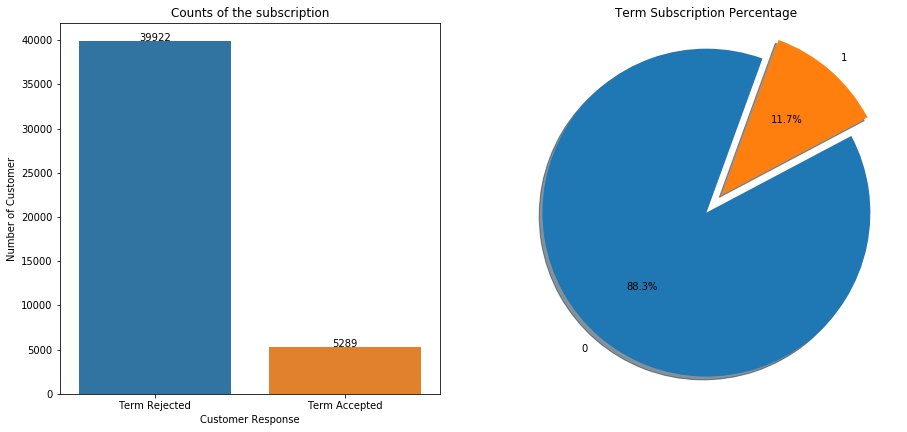

In [63]:
fig1 = plt.figure(figsize=(15,15))
fig1.add_subplot(2,2,1)
ax = sns.countplot(x="Target", data=bank_df)
plt.title('Counts of the subscription')
plt.xlabel('Customer Response')
plt.ylabel('Number of Customer')
ax.set_xticklabels(["Term Rejected","Term Accepted"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")

fig1.add_subplot(2,2,2)
explode = (0, 0.15)
plt.pie(loan_counts["Target"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
plt.axis('equal')
plt.title("Term Subscription Percentage")
plt.show()

From the above graphs, clearly I can see the no. of customers who accepted and rejected the subscription which is 5289 and 39922 respectively. I used seaborn countplot function to display that.

### Comparing other attributes against target column  to check the influence

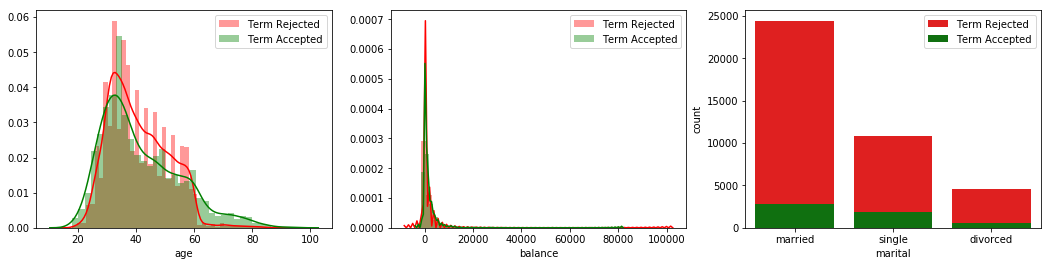

In [135]:
fig1 = plt.figure(figsize=(18,4))
fig1.add_subplot(1,3,1)
sns.distplot( bank_df[bank_df.Target == 0]['age'], color = 'r')
sns.distplot( bank_df[bank_df.Target == 1]['age'], color = 'g')
plt.gca().legend(('Term Rejected','Term Accepted'))
fig1.add_subplot(1,3,2)
sns.distplot( bank_df[bank_df.Target == 0]['balance'], color = 'r')
sns.distplot( bank_df[bank_df.Target == 1]['balance'], color = 'g')
plt.gca().legend(('Term Rejected','Term Accepted'))
fig1.add_subplot(1,3,3)
sns.countplot( bank_df[bank_df.Target == 0]['marital'], color = 'r')
cmp = sns.countplot( bank_df[bank_df.Target == 1]['marital'], color = 'g')
cmp.set_xticklabels(["married","single","divorced"])
plt.gca().legend(('Term Rejected','Term Accepted'))
plt.show()

<b> Comment: </b> The above graph diplaying the comparison of age and balance attribute with Target column. 

* I found most people interacting with the campaign is under the age between 23 - 55 years. So this information will help for the marketing calls in future.
* Also for the people with balance near about 0 to 10000 euros are having the better response.
* The term rejection amount is quite high amoing the all marital status.

<b>Visual presentation of the relation between Age and Balance</b>

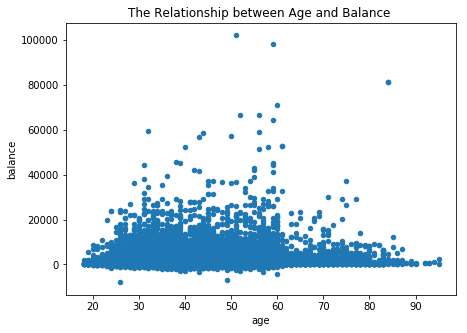

In [76]:
scatter_age_balance = bank_df.plot.scatter('age','balance',figsize = (7,5))
plt.title('The Relationship between Age and Balance ')
plt.show()

<b>Comment : </b> Based on the above scatter plot, there is no clear relationship between customer’s age and balance attribute.

But over the age of 60, customer tend to have a significantly lower balance, mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

<b>Visual presentation of the relation between duration and campaign</b>

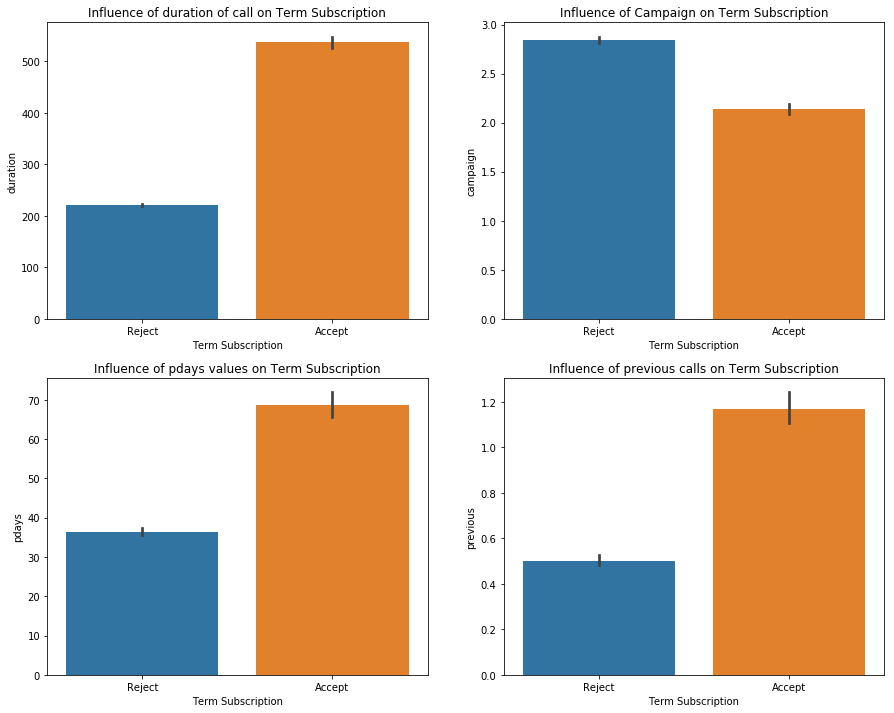

In [137]:
fig1 = plt.figure(figsize=(15,12))
fig1.add_subplot(2,2,1)
compFig2 = sns.barplot(x='Target',y='duration',data=bank_df)
plt.title('Influence of duration of call on Term Subscription')
plt.xlabel('Term Subscription')
compFig2.set_xticklabels(["Reject","Accept"])
fig1.add_subplot(2,2,2)
compFig3 = sns.barplot(x='Target',y='campaign',data=bank_df)
plt.title('Influence of Campaign on Term Subscription')
plt.xlabel('Term Subscription')
compFig3.set_xticklabels(["Reject","Accept"])
fig1.add_subplot(2,2,3)
compFig4 = sns.barplot(x='Target',y='pdays',data=bank_df)
plt.title('Influence of pdays values on Term Subscription')
plt.xlabel('Term Subscription')
compFig4.set_xticklabels(["Reject","Accept"])
fig1.add_subplot(2,2,4)
compFig5 = sns.barplot(x='Target',y='previous',data=bank_df)
plt.title('Influence of previous calls on Term Subscription')
plt.xlabel('Term Subscription')
compFig5.set_xticklabels(["Reject","Accept"])
plt.show()

<b> Comment: </b> The above graphs represents the influence of `duration`, `campaign`, `pdays` and `previous` column over term subscription acceptance and rejection.

* Customers with higher call duration, pdays and maximum previous contacts accepting the term. 
* But less rate of acceptance of the term who has been contacted more in current campaign.

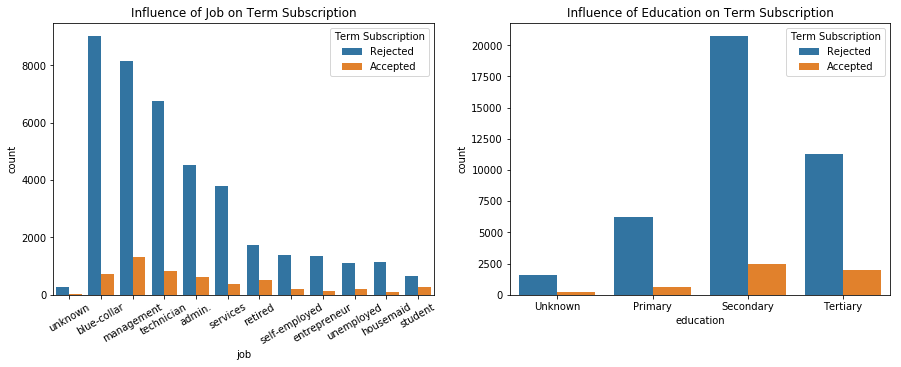

In [106]:
fig1 = plt.figure(figsize=(15,5))
fig1.add_subplot(1,2,1)
compPlot1 = sns.countplot(hue='Target',x='job',data=bank_df)
leg = compPlot1.axes.get_legend()
leg.set_title('Term Subscription')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
compPlot1.set_xticklabels(["unknown", "blue-collar", "management", "technician", "admin.", "services", "retired", "self-employed", "entrepreneur", "unemployed", "housemaid", "student"])
compPlot1.set_xticklabels(compPlot1.get_xticklabels(), rotation=30)
plt.title('Influence of Job on Term Subscription')
fig1.add_subplot(1,2,2)
compPlot2 =sns.countplot(hue='Target',x='education',data=bank_df)
leg = compPlot2.axes.get_legend()
leg.set_title('Term Subscription')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.title('Influence of Education on Term Subscription')
compPlot2.set_xticklabels(["Unknown","Primary","Secondary","Tertiary"])
plt.show()

<b> Comment: </b> The above graphs represents the influence of `job` and `education` column over term subscription acceptance and rejection.

* Customers who have job of management is the highest term acceptor among all but rejection of term subscription is highest among blue-collar job role.
* Ration of rejection and acceptance of term subscription among education lavel is same but the influence is mostly seen on the secondary lavel.

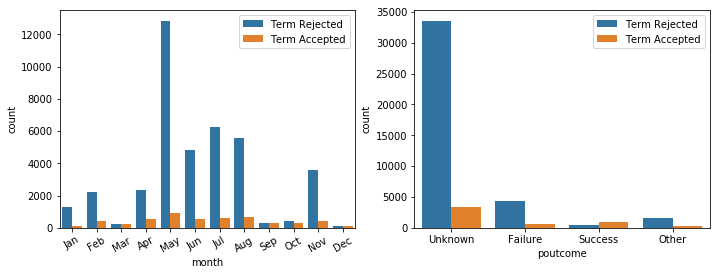

In [124]:
fig1 = plt.figure(figsize=(18,4))
fig1.add_subplot(1,3,1)
compPlot1 = sns.countplot('month',data=bank_df,hue="Target")
plt.gca().legend(('Term Rejected','Term Accepted'))
compPlot1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
compPlot1.set_xticklabels(compPlot1.get_xticklabels(), rotation=30)
fig1.add_subplot(1,3,2)
compPlot2 = sns.countplot('poutcome',data=bank_df,hue="Target")
plt.gca().legend(('Term Rejected','Term Accepted'))
compPlot2.set_xticklabels(["Unknown","Failure","Success","Other"])
plt.show()

<b> Comment: </b> Here is a graph representing the influence of Term Subscription on `month` and `poutcome` column.

* I have noticed that on march, september and december the ration of term reject and accept is almost equal.
* Rejection rate is more ove failure, other and unknown column.
* May month is having the highest point of contacts.

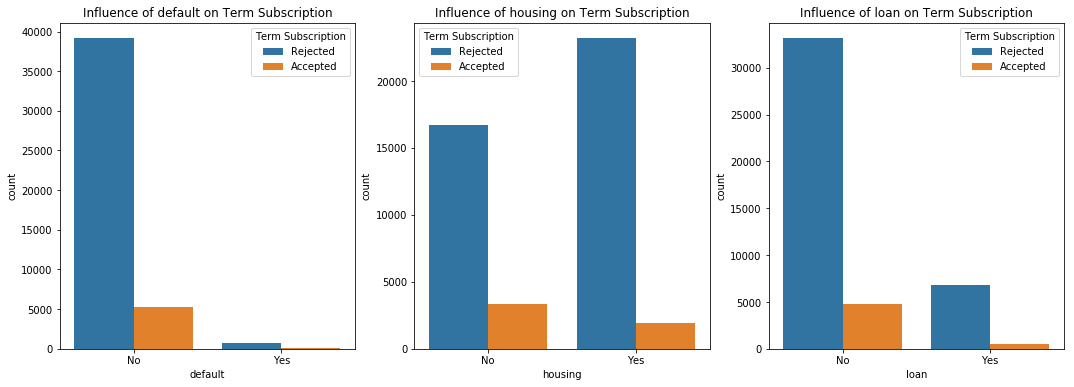

In [129]:
fig1 = plt.figure(figsize=(18,6))
fig1.add_subplot(1,3,1)
compFig1 = sns.countplot(x='default',data=bank_df,hue='Target')
plt.title('Influence of default on Term Subscription')
plt.xlabel('default')
leg = compFig1.axes.get_legend()
leg.set_title('Term Subscription')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)    
compFig1.set_xticklabels(["No","Yes"])

fig1.add_subplot(1,3,2)
compFig2 = sns.countplot(x='housing',data=bank_df,hue='Target')
plt.title('Influence of housing on Term Subscription')
plt.xlabel('housing')
leg = compFig2.axes.get_legend()
leg.set_title('Term Subscription')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
compFig2.set_xticklabels(["No","Yes"])

fig1.add_subplot(1,3,3)
compFig3 = sns.countplot(x='loan',data=bank_df,hue='Target')
plt.title('Influence of loan on Term Subscription')
plt.xlabel('loan')
leg = compFig3.axes.get_legend()
leg.set_title('Term Subscription')
new_labels = ['Rejected', 'Accepted']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
compFig3.set_xticklabels(["No","Yes"])
    
plt.show()

<b> Comment: </b> Above graphs showing the influence on Term subscription over `default`, `housing` and `loan` column respectively.
 
* Customers who are not defaulter having more response and subscription rejection.
* Customers who doesn't have house loan or personal loan accept more subscription.

### Corelation checking

* Checking the corelation using pandas corr() function

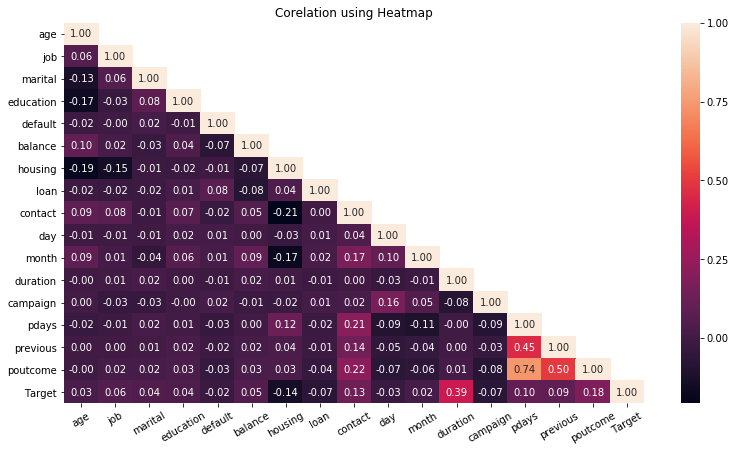

In [70]:
corr = bank_df.corr()
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
hmap = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=30)
plt.title('Corelation using Heatmap')
plt.show()

<b>Comment: </b> 

* Most of the attributes are not corelated with target column except `duration` attribute which is having highest corelation `0.39` with Target column.
* Other than that `pdays` and `poutcome`, `pdays` and `previous`, `previous` and `poutcome` are moderately corelated between each other.

### Dimension Changing

* Dropping `contact` column as we can judge the device in which the customer has been contacted does not put any impact on the term subscription.

In [139]:
bank_df_2 = bank_df.drop(['contact'], axis=1, inplace=False)
bank_df_2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'Target'],
      dtype='object')

<b>Comment :</b> I used drop() function with axis `1` and inplace `False` to not to completely remove the mentioned attributes column vise.

* Changing the unknown value and replace with other in poutcome column. Reason is simple reducing the unique value where `unknown` and `other` means same and count of `unknown` is a lot.

In [144]:
bank_df_2['poutcome'] = bank_df_2['poutcome'].replace({-1:2})
bank_df_2['poutcome'].unique()

array([2, 0, 1])

In [146]:
bank_df_2['poutcome'].value_counts()

2    38799
0     4901
1     1511
Name: poutcome, dtype: int64

<b>Comment : </b> Replaced the unknown(-1) value with other(2) with the help of replace command and then checked the available unique values and value counts.

* Changing the neccessary variables to multiple column with get dummies.

In [147]:
oneHotCols=["job","marital","poutcome"]
bank_df_2=pd.get_dummies(bank_df_2, columns=oneHotCols)
bank_df_2.head(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,58,3,0,2143,2,0,5,5,261,1,...,0,0,0,0,1,0,0,0,0,1
1,44,2,0,29,2,0,5,5,151,1,...,0,0,0,0,0,1,0,0,0,1
2,33,2,0,2,2,1,5,5,76,1,...,1,0,0,0,1,0,0,0,0,1
3,47,-1,0,1506,2,0,5,5,92,1,...,0,0,0,0,1,0,0,0,0,1
4,33,-1,0,1,1,0,5,5,198,1,...,0,0,0,0,0,1,0,0,0,1
5,35,3,0,231,2,0,5,5,139,1,...,0,0,0,0,1,0,0,0,0,1
6,28,3,0,447,2,1,5,5,217,1,...,0,0,0,0,0,1,0,0,0,1
7,42,3,1,2,2,0,5,5,380,1,...,1,0,0,0,0,0,1,0,0,1
8,58,1,0,121,2,0,5,5,50,1,...,0,0,0,0,1,0,0,0,0,1
9,43,2,0,593,2,0,5,5,55,1,...,0,0,0,0,0,1,0,0,0,1


In [148]:
bank_df_2.shape

(45211, 31)

<b>Comment :</b> I selected three attributes to do get_dummies `job`,`marital` and `poutcome` as these attributes are having ordinal variables and those cannot be ordered in a sequence. 

After applying the get_dummies I checked the shape, found dimension got increased

<hr>

## Model Building

<b>Train and Test data spliting</b>

* Data spliting into train and test set with the refined dataset

In [149]:
# Creating the independent data separate
X_set = bank_df_2.drop('Target', axis=1)
# Creating the dependent data separate
y_set = bank_df_2['Target']

# data spliting using 70:30 train test data ratio and randon seeding 7
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.30, random_state=7)

Split the dataframe into 70 and 30 ratio for training and testing dataset respectively. 
 * I have used `X_train, X_test, y_train, y_test` these splited variable.

In [150]:
# scale all the columns of the bank_df. This will produce a numpy array
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

/Users/soumalyab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  
/Users/soumalyab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


* Scaled the data to reduce the outlier impact on Target result

<hr>

## <center><u>:: Base Model Evaluation ::</u></center>

In [301]:
# array declaration for base model results
results_base = []
names_base = []
seed=7
n_splits=10

### <u>Logistic Regression</u>

In [303]:
# Calling Logistic function
LR_base_model = LogisticRegression(solver='lbfgs')
# Train and fitting our model
LR_base_model.fit(X_train_scaled, y_train)

# model Scoring
LR_base_expected = y_test
# Prediction of model from test data
LR_base_predicted = LR_base_model.predict(X_test_scaled)


print('Logistic Regression Base Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
LR_base_matrics_accuracy = metrics.accuracy_score(LR_base_expected, LR_base_predicted)
print(f'Matrics Accuracy Score : {round(LR_base_matrics_accuracy*100,2)}%') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
LR_base_confusion_metrics = metrics.confusion_matrix(LR_base_expected, LR_base_predicted)
print('CONFUSION MATRICS :')
print(LR_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
LR_base_report = metrics.classification_report(LR_base_expected, LR_base_predicted, output_dict=True)
print(metrics.classification_report(LR_base_expected, LR_base_predicted))

model_acceptation_precision = LR_base_report['1']['precision']
model_rejection_precision = LR_base_report['0']['precision']

model_acceptation_recall = LR_base_report['1']['recall']
model_rejection_recall = LR_base_report['0']['recall']

model_acceptation_fscore = LR_base_report['1']['f1-score']
model_rejection_fscore = LR_base_report['0']['f1-score']
model_weigthed_fscore = LR_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(LR_base_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
LR_base_cv_results = cross_val_score(LR_base_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', LR_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', LR_base_cv_results.std()))
results_base.append(LR_base_cv_results)
names_base.append('LR')

Logistic Regression Base Model:
-------------------------------------------------------------------
Matrics Accuracy Score : 90.22%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11748   282]
 [ 1044   490]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.63      0.32      0.42      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

Observation:
Overall Accuracy score is : 90.22%
Toward rejection the model's score with Precision: 91.84% , Recall: 31.94%, F1-SCORE: 94.66%
Towards acceptation the model's score with Precision: 63.47% , Recall: 31.94%, F1-SCORE: 42.5%
Weighted Avg F1-SCORE : 88.76 %
Cross Validation:
Cross Validaion Mean: 0.898506
Cross Validation Standard D

### <u>SVM (Supprot Vector Machine)</u>

In [304]:
# Calling SVC function for SVM
SVM_base_model = SVC(gamma='scale')
# Train and fitting our model
SVM_base_model.fit(X_train_scaled, y_train)

# model Scoring
SVM_base_expected = y_test
# Prediction of model from test data
SVM_base_predicted = SVM_base_model.predict(X_test_scaled)


print('Support Vector Machine Base Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
SVM_base_matrics_accuracy = metrics.accuracy_score(SVM_base_expected, SVM_base_predicted)
print(f'Matrics Accuracy Score : {round(SVM_base_matrics_accuracy*100,2)}%') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
SVM_base_confusion_metrics = metrics.confusion_matrix(SVM_base_expected, SVM_base_predicted)
print('CONFUSION MATRICS :')
print(SVM_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
SVM_base_report = metrics.classification_report(SVM_base_expected, SVM_base_predicted, output_dict=True)
print(metrics.classification_report(SVM_base_expected, SVM_base_predicted))

model_acceptation_precision = SVM_base_report['1']['precision']
model_rejection_precision = SVM_base_report['0']['precision']

model_acceptation_recall = SVM_base_report['1']['recall']
model_rejection_recall = SVM_base_report['0']['recall']

model_acceptation_fscore = SVM_base_report['1']['f1-score']
model_rejection_fscore = SVM_base_report['0']['f1-score']
model_weigthed_fscore = SVM_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(SVM_base_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=10, random_state=7)    
# train the model
SVM_base_cv_results = cross_val_score(SVM_base_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', SVM_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', SVM_base_cv_results.std()))


results_base.append(SVM_base_cv_results)
names_base.append('SVM')

Support Vector Machine Base Model:
-------------------------------------------------------------------
Matrics Accuracy Score : 89.88%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11831   199]
 [ 1173   361]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     12030
           1       0.64      0.24      0.34      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.61      0.64     13564
weighted avg       0.88      0.90      0.88     13564

Observation:
Overall Accuracy score is : 89.88%
Toward rejection the model's score with Precision: 90.98% , Recall: 23.53%, F1-SCORE: 94.52%
Towards acceptation the model's score with Precision: 64.46% , Recall: 23.53%, F1-SCORE: 34.48%
Weighted Avg F1-SCORE : 87.73 %
Cross Validation:
Cross Validaion Mean: 0.897210
Cross Validation Standa

### <u>Decision Tree</u>

In [305]:
# Calling Decision Tree Classifier function 
DT_base_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state=7)
# Train and fitting our model
DT_base_model.fit(X_train_scaled, y_train)

# model Scoring
DT_base_expected = y_test
# Prediction of model from test data
DT_base_predicted = DT_base_model.predict(X_test_scaled)


# Prediction of model from train data
DT_base_predicted_train = DT_base_model.predict(X_train_scaled)


print('Decision Tree Base Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
DT_base_matrics_accuracy = metrics.accuracy_score(DT_base_expected, DT_base_predicted)
DT_base_matrics_accuracy_train = metrics.accuracy_score(y_train, DT_base_predicted_train)
print(f'Matrics Accuracy Score (with train dataset) : {round(DT_base_matrics_accuracy_train*100,2)}%') 
print(f'Matrics Accuracy Score (with test dataset) : {round(DT_base_matrics_accuracy*100,2)}%')
print('-------------------------------------------------------------------')
print('Decision Tree Overfiting checking:')
DT_base_matrics_ratio = (DT_base_matrics_accuracy/DT_base_matrics_accuracy_train)
print('-------------------------------------------------------------------')
print(f'Overfiting Ration : {DT_base_matrics_ratio}') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
DT_base_confusion_metrics = metrics.confusion_matrix(DT_base_expected, DT_base_predicted)
print('CONFUSION MATRICS :')
print(DT_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
DT_base_report = metrics.classification_report(DT_base_expected, DT_base_predicted, output_dict=True)
print(metrics.classification_report(DT_base_expected, DT_base_predicted))

model_acceptation_precision = DT_base_report['1']['precision']
model_rejection_precision = DT_base_report['0']['precision']

model_acceptation_recall = DT_base_report['1']['recall']
model_rejection_recall = DT_base_report['0']['recall']

model_acceptation_fscore = DT_base_report['1']['f1-score']
model_rejection_fscore = DT_base_report['0']['f1-score']
model_weigthed_fscore = DT_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(DT_base_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
DT_base_cv_results = cross_val_score(DT_base_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', DT_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', DT_base_cv_results.std()))


results_base.append(DT_base_cv_results)
names_base.append('Decision Tree')

Decision Tree Base Model:
-------------------------------------------------------------------
Matrics Accuracy Score (with train dataset) : 90.79%
Matrics Accuracy Score (with test dataset) : 90.39%
-------------------------------------------------------------------
Decision Tree Overfiting checking:
-------------------------------------------------------------------
Overfiting Ration : 0.9956456499345397
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11660   370]
 [  933   601]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12030
           1       0.62      0.39      0.48      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564

Observation:
Overall Accuracy score is : 90.39%
Toward rejection th

### <u>KNN (K-Nearest Neighbour)</u>

In [314]:
# Calling KNN Classifier function 
KNN_base_model = KNeighborsClassifier()
# Train and fitting our model
KNN_base_model.fit(X_train_scaled, y_train)

# model Scoring
KNN_base_expected = y_test
# Prediction of model from test data
KNN_base_predicted = KNN_base_model.predict(X_test_scaled)


# Prediction of model from train data
KNN_base_predicted_train = KNN_base_model.predict(X_train_scaled)


print('KNN Base Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
KNN_base_matrics_accuracy = metrics.accuracy_score(KNN_base_expected, KNN_base_predicted)
print(f'Matrics Accuracy Score (with test dataset) : {round(KNN_base_matrics_accuracy*100,2)}%')
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
KNN_base_confusion_metrics = metrics.confusion_matrix(KNN_base_expected, KNN_base_predicted)
print('CONFUSION MATRICS :')
print(KNN_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
KNN_base_report = metrics.classification_report(KNN_base_expected, KNN_base_predicted, output_dict=True)
print(metrics.classification_report(KNN_base_expected, KNN_base_predicted))

model_acceptation_precision = KNN_base_report['1']['precision']
model_rejection_precision = KNN_base_report['0']['precision']

model_acceptation_recall = KNN_base_report['1']['recall']
model_rejection_recall = KNN_base_report['0']['recall']

model_acceptation_fscore = KNN_base_report['1']['f1-score']
model_rejection_fscore = KNN_base_report['0']['f1-score']
model_weigthed_fscore = KNN_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(KNN_base_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
KNN_base_cv_results = cross_val_score(KNN_base_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', KNN_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', KNN_base_cv_results.std()))


results_base.append(KNN_base_cv_results)
names_base.append('KNN')

KNN Base Model:
-------------------------------------------------------------------
Matrics Accuracy Score (with test dataset) : 89.44%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11655   375]
 [ 1057   477]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12030
           1       0.56      0.31      0.40      1534

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.88      0.89      0.88     13564

Observation:
Overall Accuracy score is : 89.44%
Toward rejection the model's score with Precision: 91.69% , Recall: 31.1%, F1-SCORE: 94.21%
Towards acceptation the model's score with Precision: 55.99% , Recall: 31.1%, F1-SCORE: 39.98%
Weighted Avg F1-SCORE : 88.08 %
Cross Validation:
Cross Validaion Mean: 0.891460
Cross Validation Standar

### <u>Naive-Bayes Model</u>

In [316]:
# Calling Logistic function
NB_base_model = GaussianNB()
# Train and fitting our model
NB_base_model.fit(X_train_scaled, y_train)

# model Scoring
NB_base_expected = y_test
# Prediction of model from test data
NB_base_predicted = NB_base_model.predict(X_test_scaled)


print('Naive-Bayes Base Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
NB_base_matrics_accuracy = metrics.accuracy_score(NB_base_expected, NB_base_predicted)
print(f'Matrics Accuracy Score : {round(NB_base_matrics_accuracy*100,2)}%') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
NB_base_confusion_metrics = metrics.confusion_matrix(NB_base_expected, NB_base_predicted)
print('CONFUSION MATRICS :')
print(LR_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
NB_base_report = metrics.classification_report(NB_base_expected, NB_base_predicted, output_dict=True)
print(metrics.classification_report(NB_base_expected, NB_base_predicted))

model_acceptation_precision = NB_base_report['1']['precision']
model_rejection_precision = NB_base_report['0']['precision']

model_acceptation_recall = NB_base_report['1']['recall']
model_rejection_recall = NB_base_report['0']['recall']

model_acceptation_fscore = NB_base_report['1']['f1-score']
model_rejection_fscore = NB_base_report['0']['f1-score']
model_weigthed_fscore = NB_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(NB_base_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
NB_base_cv_results = cross_val_score(NB_base_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', NB_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', NB_base_cv_results.std()))
results_base.append(NB_base_cv_results)
names_base.append('NB')

Naive-Bayes Base Model:
-------------------------------------------------------------------
Matrics Accuracy Score : 83.6%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11748   282]
 [ 1044   490]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     12030
           1       0.35      0.50      0.41      1534

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.64      0.69      0.66     13564
weighted avg       0.87      0.84      0.85     13564

Observation:
Overall Accuracy score is : 83.6%
Toward rejection the model's score with Precision: 93.26% , Recall: 50.2%, F1-SCORE: 90.48%
Towards acceptation the model's score with Precision: 34.53% , Recall: 50.2%, F1-SCORE: 40.91%
Weighted Avg F1-SCORE : 84.88 %
Cross Validation:
Cross Validaion Mean: 0.833255
Cross Validation Standard Deviation: 0

<hr>

##### <u>Base Classification Model Performance Comparison</u>

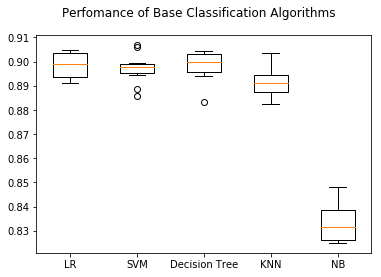

In [317]:
fig = plt.figure()
fig.suptitle('Perfomance of Base Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_base)
ax.set_xticklabels(names_base)
plt.show()

<b>Comments : </b> The above boxplot graph represent the scoring of the executed models. It's clear that <b>Logistic Regression (LR)</b> and <b>Decision Tree</b> is the top two highest scoring base model.

* LR Score : 90.22%
* DT Score : 90.39%

<hr>

## <center><u>:: Ensemble Models ::</u></center>


From the above base model evaluation, I found <b>Logistic Regression</b> and <b>Decision Tree</b> scores the highest among the other models. So I'm going to implement the ensemble learning on those two high scoring models.

### <u>Bagging Classifier</u>

In [318]:
kfold = KFold(n_splits=10, random_state=7)
num_trees = 100
seed = 7
ensemble_compare_result = []
ensemble_compare_name = []

* <b>Base Model : Logistic Regression</b>

In [319]:
BGCL_LR_model = BaggingClassifier(base_estimator=LR_base_model, n_estimators=num_trees, random_state=seed)
# Train and fitting our model
BGCL_LR_model.fit(X_train_scaled, y_train)

# model Scoring
BGCL_LR_expected = y_test
# Prediction of model from test data
BGCL_LR_predicted = BGCL_LR_model.predict(X_test_scaled)


print('Logistic Model Ensemble Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
BGCL_LR_matrics_accuracy = metrics.accuracy_score(BGCL_LR_expected, BGCL_LR_predicted) 
print(f'Matrics Accuracy Score (with test dataset) : {round(BGCL_LR_matrics_accuracy*100,2)}%')
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
BGCL_LR_confusion_metrics = metrics.confusion_matrix(BGCL_LR_expected, BGCL_LR_predicted)
print('CONFUSION MATRICS :')
print(BGCL_LR_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
BGCL_LR_report = metrics.classification_report(BGCL_LR_expected, BGCL_LR_predicted, output_dict=True)
print(metrics.classification_report(BGCL_LR_expected, BGCL_LR_predicted))

model_acceptation_precision = BGCL_LR_report['1']['precision']
model_rejection_precision = BGCL_LR_report['0']['precision']

model_acceptation_recall = BGCL_LR_report['1']['recall']
model_rejection_recall = BGCL_LR_report['0']['recall']

model_acceptation_fscore = BGCL_LR_report['1']['f1-score']
model_rejection_fscore = BGCL_LR_report['0']['f1-score']
model_weigthed_fscore = BGCL_LR_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(BGCL_LR_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
BGCL_LR_results = cross_val_score(BGCL_LR_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print("%s: %f" % ('Cross Validaion Mean', BGCL_LR_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', BGCL_LR_results.std()))
bagging_compare_LR_df = pd.DataFrame({'Model': ['Logistic Regression'] ,'Base Score' : [LR_base_cv_results.mean()], 'Ensemble Score' : [BGCL_LR_results.mean()]})
ensemble_compare_result.append(BGCL_LR_results)
ensemble_compare_name.append('LR')

Logistic Model Ensemble Model:
-------------------------------------------------------------------
Matrics Accuracy Score (with test dataset) : 90.25%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11749   281]
 [ 1041   493]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.64      0.32      0.43      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

Observation:
Overall Accuracy score is : 90.25%
Toward rejection the model's score with Precision: 91.86% , Recall: 32.14%, F1-SCORE: 94.67%
Towards acceptation the model's score with Precision: 63.7% , Recall: 32.14%, F1-SCORE: 42.72%
Weighted Avg F1-SCORE : 88.8 %
Cross Validation:
Cross Validaion Mean: 0.898695
Cross Val

* <b>Base Model : Decision Tree</b>

In [320]:
BGCL_DT_model = BaggingClassifier(base_estimator=DT_base_model, n_estimators=num_trees, random_state=seed)
# Train and fitting our model
BGCL_DT_model.fit(X_train_scaled, y_train)

# model Scoring
BGCL_DT_expected = y_test
# Prediction of model from test data
BGCL_DT_predicted = BGCL_DT_model.predict(X_test_scaled)


print('Decision Tree Ensemble Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
BGCL_DT_matrics_accuracy = metrics.accuracy_score(BGCL_DT_expected, BGCL_DT_predicted) 
print(f'Matrics Accuracy Score (with test dataset) : {round(BGCL_DT_matrics_accuracy*100,2)}%')
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
BGCL_DT_confusion_metrics = metrics.confusion_matrix(BGCL_DT_expected, BGCL_DT_predicted)
print('CONFUSION MATRICS :')
print(BGCL_DT_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
BGCL_DT_report = metrics.classification_report(BGCL_DT_expected, BGCL_DT_predicted, output_dict=True)
print(metrics.classification_report(BGCL_DT_expected, BGCL_DT_predicted))

model_acceptation_precision = BGCL_DT_report['1']['precision']
model_rejection_precision = BGCL_DT_report['0']['precision']

model_acceptation_recall = BGCL_DT_report['1']['recall']
model_rejection_recall = BGCL_DT_report['0']['recall']

model_acceptation_fscore = BGCL_DT_report['1']['f1-score']
model_rejection_fscore = BGCL_DT_report['0']['f1-score']
model_weigthed_fscore = BGCL_DT_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(BGCL_DT_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
BGCL_DT_results = cross_val_score(BGCL_DT_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print("%s: %f" % ('Cross Validaion Mean', BGCL_DT_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', BGCL_DT_results.std()))
bagging_compare_DT_df = pd.DataFrame({'Model': ['Desicion Tree'] ,'Base Score' : [DT_base_cv_results.mean()], 'Ensemble Score' : [BGCL_DT_results.mean()]})
ensemble_compare_result.append(BGCL_DT_results)
ensemble_compare_name.append('DT')

Decision Tree Ensemble Model:
-------------------------------------------------------------------
Matrics Accuracy Score (with test dataset) : 90.46%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11727   303]
 [  991   543]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12030
           1       0.64      0.35      0.46      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

Observation:
Overall Accuracy score is : 90.46%
Toward rejection the model's score with Precision: 92.21% , Recall: 35.4%, F1-SCORE: 94.77%
Towards acceptation the model's score with Precision: 64.18% , Recall: 35.4%, F1-SCORE: 45.63%
Weighted Avg F1-SCORE : 89.21 %
Cross Validation:
Cross Validaion Mean: 0.900244
Cross Vali

#### <u>Compare Bagging Classifier results with base model</u>

In [322]:
# Creating a single dataframe and merging above dataframes into it
bagging_compare_df = pd.DataFrame()
bagging_compare_df = bagging_compare_df.append(bagging_compare_LR_df)
bagging_compare_df = bagging_compare_df.append(bagging_compare_DT_df)

bagging_compare_df.head()

,Model,Base Score,Ensemble Score
0,Logistic Regression,0.898506,0.898695
0,Desicion Tree,0.898221,0.900244


<b>Comments : </b> After comparing the bagging classifier different models score with it's base model, we can see For both Logistic and Decision Tree model the ensemble score improved than base model score. <b>Decision Tree</b> scores the highest : 0.90 with cross validation.

<hr>

### <u>AdaBoost Classifier</u>

In [330]:
num_trees = 30
seed = 7
ensemble_compare_result = []
ensemble_compare_name = []

* <b>Base Model : Logistic Regression</b>

In [331]:
BOCL_LR_model = AdaBoostClassifier(base_estimator=LR_base_model, n_estimators=num_trees, random_state=seed)

# Train and fitting our model
BOCL_LR_model.fit(X_train_scaled, y_train)

# model Scoring
BOCL_LR_expected = y_test
# Prediction of model from test data
BOCL_LR_predicted = BOCL_LR_model.predict(X_test_scaled)


print('Logistic Model Ensemble Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
BOCL_LR_matrics_accuracy = metrics.accuracy_score(BOCL_LR_expected, BOCL_LR_predicted) 
print(f'Matrics Accuracy Score (with test dataset) : {round(BOCL_LR_matrics_accuracy*100,2)}%')
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
BOCL_LR_confusion_metrics = metrics.confusion_matrix(BOCL_LR_expected, BOCL_LR_predicted)
print('CONFUSION MATRICS :')
print(BOCL_LR_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
BOCL_LR_report = metrics.classification_report(BOCL_LR_expected, BOCL_LR_predicted, output_dict=True)
print(metrics.classification_report(BOCL_LR_expected, BOCL_LR_predicted))

model_acceptation_precision = BOCL_LR_report['1']['precision']
model_rejection_precision = BOCL_LR_report['0']['precision']

model_acceptation_recall = BOCL_LR_report['1']['recall']
model_rejection_recall = BOCL_LR_report['0']['recall']

model_acceptation_fscore = BOCL_LR_report['1']['f1-score']
model_rejection_fscore = BOCL_LR_report['0']['f1-score']
model_weigthed_fscore = BOCL_LR_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(BOCL_LR_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
BOCL_LR_results = cross_val_score(BOCL_LR_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print("%s: %f" % ('Cross Validaion Mean', BOCL_LR_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', BOCL_LR_results.std()))
boosting_compare_LR_df = pd.DataFrame({'Model': ['Logistic Regression'] ,'Base Score' : [LR_base_cv_results.mean()], 'Ensemble Score' : [BOCL_LR_results.mean()]})
ensemble_compare_result.append(BOCL_LR_results)
ensemble_compare_name.append('LR')

Logistic Model Ensemble Model:
-------------------------------------------------------------------
Matrics Accuracy Score (with test dataset) : 89.94%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11814   216]
 [ 1149   385]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     12030
           1       0.64      0.25      0.36      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.78      0.62      0.65     13564
weighted avg       0.88      0.90      0.88     13564

Observation:
Overall Accuracy score is : 89.94%
Toward rejection the model's score with Precision: 91.14% , Recall: 25.1%, F1-SCORE: 94.54%
Towards acceptation the model's score with Precision: 64.06% , Recall: 25.1%, F1-SCORE: 36.07%
Weighted Avg F1-SCORE : 87.93 %
Cross Validation:
Cross Validaion Mean: 0.896073
Cross Val

* <b>Base Model : Decision Tree</b>

In [325]:
BOCL_DT_model = AdaBoostClassifier(base_estimator=DT_base_model, n_estimators=num_trees, random_state=seed)
# Train and fitting our model
BOCL_DT_model.fit(X_train_scaled, y_train)

# model Scoring
BOCL_DT_expected = y_test
# Prediction of model from test data
BOCL_DT_predicted = BOCL_DT_model.predict(X_test_scaled)


print('Decision Tree Ensemble Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
BOCL_DT_matrics_accuracy = metrics.accuracy_score(BOCL_DT_expected, BOCL_DT_predicted) 
print(f'Matrics Accuracy Score (with test dataset) : {round(BOCL_DT_matrics_accuracy*100,2)}%')
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
BOCL_DT_confusion_metrics = metrics.confusion_matrix(BOCL_DT_expected, BOCL_DT_predicted)
print('CONFUSION MATRICS :')
print(BOCL_DT_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
BOCL_DT_report = metrics.classification_report(BOCL_DT_expected, BOCL_DT_predicted, output_dict=True)
print(metrics.classification_report(BOCL_DT_expected, BOCL_DT_predicted))

model_acceptation_precision = BOCL_DT_report['1']['precision']
model_rejection_precision = BOCL_DT_report['0']['precision']

model_acceptation_recall = BOCL_DT_report['1']['recall']
model_rejection_recall = BOCL_DT_report['0']['recall']

model_acceptation_fscore = BOCL_DT_report['1']['f1-score']
model_rejection_fscore = BOCL_DT_report['0']['f1-score']
model_weigthed_fscore = BOCL_DT_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(BOCL_DT_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
BOCL_DT_results = cross_val_score(BOCL_DT_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print("%s: %f" % ('Cross Validaion Mean', BOCL_DT_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', BOCL_DT_results.std()))
boosting_compare_DT_df = pd.DataFrame({'Model': ['Desicion Tree'] ,'Base Score' : [DT_base_cv_results.mean()], 'Ensemble Score' : [BOCL_DT_results.mean()]})
ensemble_compare_result.append(BOCL_DT_results)
ensemble_compare_name.append('DT')

Decision Tree Ensemble Model:
-------------------------------------------------------------------
Matrics Accuracy Score (with test dataset) : 88.73%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11395   635]
 [  894   640]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12030
           1       0.50      0.42      0.46      1534

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.71      0.68      0.70     13564
weighted avg       0.88      0.89      0.88     13564

Observation:
Overall Accuracy score is : 88.73%
Toward rejection the model's score with Precision: 92.73% , Recall: 41.72%, F1-SCORE: 93.71%
Towards acceptation the model's score with Precision: 50.2% , Recall: 41.72%, F1-SCORE: 45.57%
Weighted Avg F1-SCORE : 88.27 %
Cross Validation:
Cross Validaion Mean: 0.885772
Cross Val

#### <u>Compare Boosting Classifier results with base model</u>

In [327]:
# Creating a single dataframe and merging above dataframes into it
boosting_compare_df = pd.DataFrame()
boosting_compare_df = boosting_compare_df.append(boosting_compare_LR_df)
boosting_compare_df = boosting_compare_df.append(boosting_compare_DT_df)

boosting_compare_df.head()

,Model,Base Score,Ensemble Score
0,Logistic Regression,0.898506,0.896073
0,Desicion Tree,0.898221,0.885772


<b>Comments : </b> After comparing the boosting classifier different models score with it's base model, we can see For both Logistic and Decision Tree model the ensemble score decrease than the base model score. But here <b>Logistic Regression</b> scores the highest : 0.896 with cross validation in ensemble learing among two.

<hr>

### <u>GradientBoost Classifier</u>

In [330]:
num_trees = 30
seed = 7
ensemble_compare_result = []
ensemble_compare_name = []

In [335]:
GBCL_LR_model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

# Train and fitting our model
GBCL_LR_model.fit(X_train_scaled, y_train)

# model Scoring
GBCL_LR_expected = y_test
# Prediction of model from test data
GBCL_LR_predicted = GBCL_LR_model.predict(X_test_scaled)


print('Gradient Boost Ensemble Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
GBCL_LR_matrics_accuracy = metrics.accuracy_score(GBCL_LR_expected, GBCL_LR_predicted) 
print(f'Matrics Accuracy Score (with test dataset) : {round(GBCL_LR_matrics_accuracy*100,2)}%')
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
GBCL_LR_confusion_metrics = metrics.confusion_matrix(GBCL_LR_expected, GBCL_LR_predicted)
print('CONFUSION MATRICS :')
print(GBCL_LR_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
GBCL_LR_report = metrics.classification_report(GBCL_LR_expected, GBCL_LR_predicted, output_dict=True)
print(metrics.classification_report(GBCL_LR_expected, GBCL_LR_predicted))

model_acceptation_precision = GBCL_LR_report['1']['precision']
model_rejection_precision = GBCL_LR_report['0']['precision']

model_acceptation_recall = GBCL_LR_report['1']['recall']
model_rejection_recall = GBCL_LR_report['0']['recall']

model_acceptation_fscore = GBCL_LR_report['1']['f1-score']
model_rejection_fscore = GBCL_LR_report['0']['f1-score']
model_weigthed_fscore = GBCL_LR_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(GBCL_LR_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
GBCL_LR_results = cross_val_score(GBCL_LR_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print("%s: %f" % ('Cross Validaion Mean', GBCL_LR_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', GBCL_LR_results.std()))

Gradient Boost Ensemble Model:
-------------------------------------------------------------------
Matrics Accuracy Score (with test dataset) : 90.39%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11816   214]
 [ 1090   444]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.67      0.29      0.41      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.80      0.64      0.68     13564
weighted avg       0.89      0.90      0.89     13564

Observation:
Overall Accuracy score is : 90.39%
Toward rejection the model's score with Precision: 91.55% , Recall: 28.94%, F1-SCORE: 94.77%
Towards acceptation the model's score with Precision: 67.48% , Recall: 28.94%, F1-SCORE: 40.51%
Weighted Avg F1-SCORE : 88.63 %
Cross Validation:
Cross Validaion Mean: 0.900180
Cross V

<b>Comments : </b> Executed Gradient Boosting Technique. Got the score of 0.9001 with cross validation and model accuracy : 90.39%

<hr>

### <u>Random Forest Classifier</u>

* <b>Base Model : Decision Tree</b>

In [328]:
RFCL_DT_model = RandomForestClassifier(n_estimators=num_trees, max_features=3)
# Train and fitting our model
RFCL_DT_model.fit(X_train_scaled, y_train)

# model Scoring
RFCL_DT_expected = y_test
# Prediction of model from test data
RFCL_DT_predicted = RFCL_DT_model.predict(X_test_scaled)


print('RandomForest Ensemble Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
RFCL_DT_matrics_accuracy = metrics.accuracy_score(RFCL_DT_expected, RFCL_DT_predicted) 
print(f'Matrics Accuracy Score (with test dataset) : {round(RFCL_DT_matrics_accuracy*100,2)}%')
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
RFCL_DT_confusion_metrics = metrics.confusion_matrix(RFCL_DT_expected, RFCL_DT_predicted)
print('CONFUSION MATRICS :')
print(RFCL_DT_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
RFCL_DT_report = metrics.classification_report(RFCL_DT_expected, RFCL_DT_predicted, output_dict=True)
print(metrics.classification_report(RFCL_DT_expected, RFCL_DT_predicted))

model_acceptation_precision = RFCL_DT_report['1']['precision']
model_rejection_precision = RFCL_DT_report['0']['precision']

model_acceptation_recall = RFCL_DT_report['1']['recall']
model_rejection_recall = RFCL_DT_report['0']['recall']

model_acceptation_fscore = RFCL_DT_report['1']['f1-score']
model_rejection_fscore = RFCL_DT_report['0']['f1-score']
model_weigthed_fscore = RFCL_DT_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(RFCL_DT_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
RFCL_DT_results = cross_val_score(RFCL_DT_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print("%s: %f" % ('Cross Validaion Mean', RFCL_DT_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', RFCL_DT_results.std()))
randomforest_compare_DT_df = pd.DataFrame({'Model': ['Desicion Tree'] ,'Base Score' : [DT_base_cv_results.mean()], 'Ensemble Score' : [RFCL_DT_results.mean()]})
ensemble_compare_result.append(RFCL_DT_results)
ensemble_compare_name.append('DT')

RandomForest Ensemble Model:
-------------------------------------------------------------------
Matrics Accuracy Score (with test dataset) : 90.32%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11784   246]
 [ 1067   467]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.65      0.30      0.42      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.79      0.64      0.68     13564
weighted avg       0.89      0.90      0.89     13564

Observation:
Overall Accuracy score is : 90.32%
Toward rejection the model's score with Precision: 91.7% , Recall: 30.44%, F1-SCORE: 94.72%
Towards acceptation the model's score with Precision: 65.5% , Recall: 30.44%, F1-SCORE: 41.57%
Weighted Avg F1-SCORE : 88.71 %
Cross Validation:
Cross Validaion Mean: 0.898190
Cross Valid

<b>Comments : </b> Executed RandomForest Technique for the decision tree model. Got the score of 0.8981 with cross validation.

<hr>

### <u>Voting Classifier</u>

In [332]:
# Using the base models
estimators = []
estimators.append(('logistic', LR_base_model))
estimators.append(('DT', DT_base_model))
# create the ensemble model
VOCL_DT_model = VotingClassifier(estimators)

# Train and fitting our model
VOCL_DT_model.fit(X_train_scaled, y_train)

# model Scoring
VOCL_DT_expected = y_test
# Prediction of model from test data
VOCL_DT_predicted = VOCL_DT_model.predict(X_test_scaled)


print('Voting Ensemble Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
VOCL_DT_matrics_accuracy = metrics.accuracy_score(VOCL_DT_expected, VOCL_DT_predicted) 
print(f'Matrics Accuracy Score (with test dataset) : {round(VOCL_DT_matrics_accuracy*100,2)}%')
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
VOCL_DT_confusion_metrics = metrics.confusion_matrix(BOCL_DT_expected, BOCL_DT_predicted)
print('CONFUSION MATRICS :')
print(VOCL_DT_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
VOCL_DT_report = metrics.classification_report(VOCL_DT_expected, VOCL_DT_predicted, output_dict=True)
print(metrics.classification_report(VOCL_DT_expected, VOCL_DT_predicted))

model_acceptation_precision = VOCL_DT_report['1']['precision']
model_rejection_precision = VOCL_DT_report['0']['precision']

model_acceptation_recall = VOCL_DT_report['1']['recall']
model_rejection_recall = VOCL_DT_report['0']['recall']

model_acceptation_fscore = VOCL_DT_report['1']['f1-score']
model_rejection_fscore = VOCL_DT_report['0']['f1-score']
model_weigthed_fscore = VOCL_DT_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(VOCL_DT_matrics_accuracy*100,2)}%')
print(f'Toward rejection the model\'s score with Precision: {round(model_rejection_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_rejection_fscore*100,2)}%')
print(f'Towards acceptation the model\'s score with Precision: {round(model_acceptation_precision*100,2)}% , Recall: {round(model_acceptation_recall*100,2)}%, F1-SCORE: {round(model_acceptation_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=n_splits, random_state=seed)    
# train the model
VOCL_DT_results = cross_val_score(VOCL_DT_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print("%s: %f" % ('Cross Validaion Mean', VOCL_DT_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', VOCL_DT_results.std()))

Voting Ensemble Model:
-------------------------------------------------------------------
Matrics Accuracy Score (with test dataset) : 90.18%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[11395   635]
 [  894   640]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     12030
           1       0.66      0.27      0.38      1534

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.79      0.63      0.67     13564
weighted avg       0.88      0.90      0.88     13564

Observation:
Overall Accuracy score is : 90.18%
Toward rejection the model's score with Precision: 91.35% , Recall: 27.05%, F1-SCORE: 94.66%
Towards acceptation the model's score with Precision: 66.08% , Recall: 27.05%, F1-SCORE: 38.39%
Weighted Avg F1-SCORE : 88.3 %
Cross Validation:
Cross Validaion Mean: 0.897937
Cross Validation

<b>Comments : </b> Executed Voting Technique for the Logistic Regression and Decision Tree model. Got the score of 0.8979 with cross validation.

<hr>

### <center>:: Conclusion ::</center>

###### <u>Below is the comparision between the ensemble model scores</u> 

<table width='100%'>
    <tr>
        <th>Ensemble Classifier</th>
        <th>Base Models</th>
        <th>Accuracy</th>
        <th>F1-SCORE (Weighted Avg)</th>
        <th>Cross Validation Mean (Deviation)</th>
    </tr>
    <tr>
        <td><b>Bagging</b></td>
        <td><b>Logistic Regression</b></td>
        <td><b>90.25%</b></td>
        <td><b>88.8%</b></td>
        <td><b>0.898695(0.005129)</b></td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td><b>DecisionTree</b></td>
        <td><b>90.46%</b></td>
        <td><b>89.21%</b></td>
        <td><b>0.900244(0.005457)</b></td>
    </tr>
    <tr>
        <td>AdaBoosting</td>
        <td>Logistic Regression</td>
        <td>89.94%</td>
        <td>87.93%</td>
        <td>0.896073(0.005999)</td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>DecisionTree</td>
        <td>88.73%</td>
        <td>88.27%</td>
        <td>0.885772(0.006579)</td>
    </tr>
    <tr>
        <td><b>GradientBoosting</b></td>
        <td>&nbsp;</td>
        <td><b>90.39%</b></td>
        <td><b>86.63%</b></td>
        <td><b>0.900180(0.005628)</b></td>
    </tr>
    <tr>
        <td><b>RandomForest</b></td>
        <td><b>DecisionTree Model</b></td>
        <td><b>90.32%</b></td>
        <td><b>88.71%</b></td>
        <td><b>0.898190(0.006162)</b></td>
    </tr>
    <tr>
        <td>Voting</td>
        <td>&nbsp;</td>
        <td>90.18%</td>
        <td>88.3%</td>
        <td>0.817937(0.005505)</td>
    </tr>
</table>


I can see from the above table that `DecisionTree Model` for Bagging Technique has the best `Accuracy  : 90.46%` and `Weighted Avg : 96.63%` and cross validation score `0.900244` with deviation `0.005457`.



#### Checking the AUC (Area Under Curve) value:

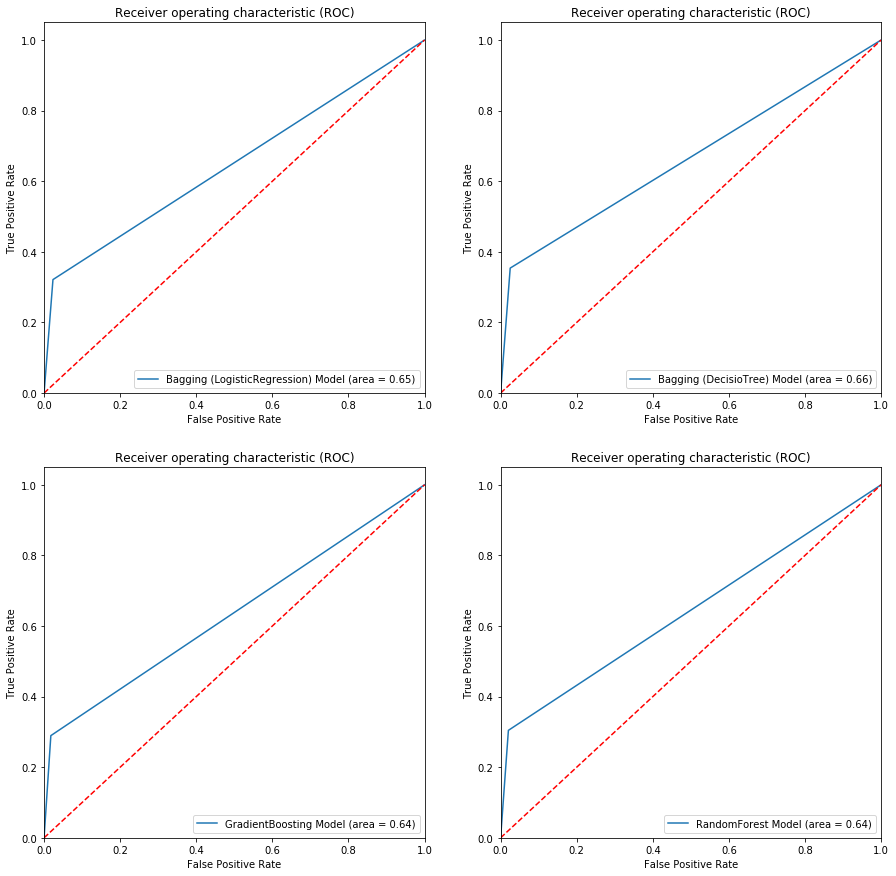

In [347]:
fig1_graph = plt.figure(figsize=(15,15))

baggingLR_fpr, baggingLR_tpr, baggingLR_threshold = metrics.roc_curve(BGCL_LR_expected, BGCL_LR_predicted)
baggingLR_roc_auc = metrics.roc_auc_score(BGCL_LR_expected, BGCL_LR_predicted)
fig1_graph.add_subplot(2,2,1)
plt.plot(baggingLR_fpr, baggingLR_tpr, label='Bagging (LogisticRegression) Model (area = %0.2f)' % baggingLR_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

baggingDT_fpr, baggingDT_tpr, baggingDT_threshold = metrics.roc_curve(BGCL_DT_expected, BGCL_DT_predicted)
baggingDT_roc_auc = metrics.roc_auc_score(BGCL_DT_expected, BGCL_DT_predicted)
fig1_graph.add_subplot(2,2,2)
plt.plot(baggingDT_fpr, baggingDT_tpr, label='Bagging (DecisioTree) Model (area = %0.2f)' % baggingDT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

GB_fpr, GB_tpr, GB_threshold = metrics.roc_curve(GBCL_LR_expected, GBCL_LR_predicted)
GB_roc_auc = metrics.roc_auc_score(GBCL_LR_expected, GBCL_LR_predicted)
fig1_graph.add_subplot(2,2,3)
plt.plot(GB_fpr, GB_tpr, label='GradientBoosting Model (area = %0.2f)' % GB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

RF_fpr, RF_tpr, RF_threshold = metrics.roc_curve(RFCL_DT_expected, RFCL_DT_predicted)
RF_roc_auc = metrics.roc_auc_score(RFCL_DT_expected, RFCL_DT_predicted)
fig1_graph.add_subplot(2,2,4)
plt.plot(RF_fpr, RF_tpr, label='RandomForest Model (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()

From the above graph of Area Under Curve I found the Bagging(DecisionTree) Model is better that other model.

* <b>Bagging(DecisionTree) Model AUC Value  : 0.66</b>
* <b>Bagging(Logistic Regression) Model AUC Value  : 0.65</b>
* <b>GradientBoosting Model AUC Value  : 0.64</b>
* <b>RandomForest Model AUC Value  : 0.64</b>

Lets evaluate the Confusion Matrics Once Again

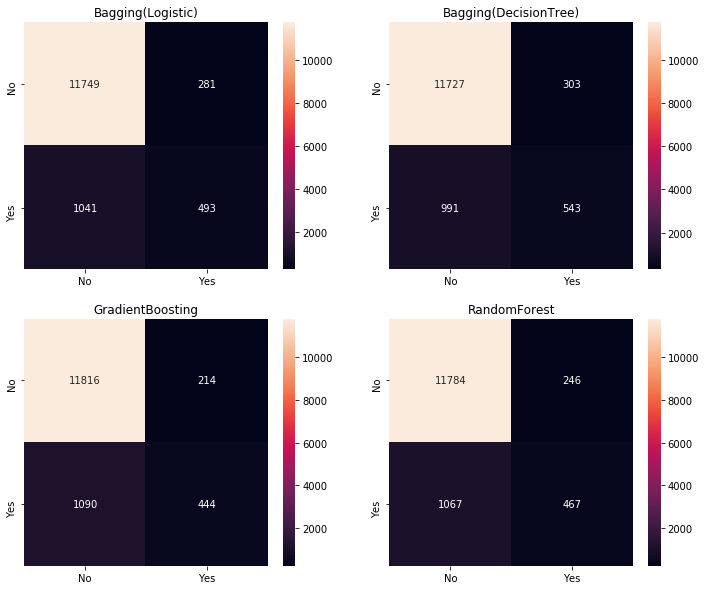

In [357]:
df_bgcl_lr = pd.DataFrame(BGCL_LR_confusion_metrics, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
cfFig = plt.figure(figsize = (12,10))
cfFig.add_subplot(2,2,1)
sns.heatmap(df_bgcl_lr, annot=True ,fmt='g')
plt.title('Bagging(Logistic)')

df_bgcl_dt = pd.DataFrame(BGCL_DT_confusion_metrics, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
cfFig.add_subplot(2,2,2)
sns.heatmap(df_bgcl_dt, annot=True ,fmt='g')
plt.title('Bagging(DecisionTree)')

df_gbcl_lr = pd.DataFrame(GBCL_LR_confusion_metrics, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
cfFig.add_subplot(2,2,3)
sns.heatmap(df_gbcl_lr, annot=True ,fmt='g')
plt.title('GradientBoosting')

df_rfcl = pd.DataFrame(RFCL_DT_confusion_metrics, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
cfFig.add_subplot(2,2,4)
sns.heatmap(df_rfcl, annot=True ,fmt='g')
plt.title('RandomForest')
plt.show()

After analyzing the cufution matrics, I see the facts below :

<b><u>Bagging(Logistic)</u></b>

<b>True Positives (TP):</b> we correctly predicted that customer accepted the term <b>493</b>

<b>True Negatives (TN):</b> we correctly predicted that customer rejected the term <b>11749</b>

<b>False Positives (FP):</b> we incorrectly predicted that customer accepted the term (a "Type I error") <b>281</b>. Falsely predict positive is <b>Type I error</b>

<b>False Negatives (FN):</b> we incorrectly predicted that customer rejected the term (a "Type II error") <b>1041</b>. Falsely predict negative is <b>Type II error</b>

<b><u>Bagging(DecisionTree)</u></b>

<b>True Positives (TP):</b> we correctly predicted that customer accepted the term <b>543</b>

<b>True Negatives (TN):</b> we correctly predicted that customer rejected the term <b>11727</b>

<b>False Positives (FP):</b> we incorrectly predicted that customer accepted the term (a "Type I error") <b>303</b>. Falsely predict positive is <b>Type I error</b>

<b>False Negatives (FN):</b> we incorrectly predicted that customer rejected the term (a "Type II error") <b>991</b>. Falsely predict negative is <b>Type II error</b>


<b><u>GradientBoosting</u></b>

<b>True Positives (TP):</b> we correctly predicted that customer accepted the term <b>444</b>

<b>True Negatives (TN):</b> we correctly predicted that customer rejected the term <b>11816</b>

<b>False Positives (FP):</b> we incorrectly predicted that customer accepted the term (a "Type I error") <b>214</b>. Falsely predict positive is <b>Type I error</b>

<b>False Negatives (FN):</b> we incorrectly predicted that customer rejected the term (a "Type II error") <b>1090</b>. Falsely predict negative is <b>Type II error</b>

<b><u>RandonForest</u></b>

<b>True Positives (TP):</b> we correctly predicted that customer accepted the term <b>467</b>

<b>True Negatives (TN):</b> we correctly predicted that customer rejected the term <b>11784</b>

<b>False Positives (FP):</b> we incorrectly predicted that customer accepted the term (a "Type I error") <b>246</b>. Falsely predict positive is <b>Type I error</b>

<b>False Negatives (FN):</b> we incorrectly predicted that customer rejected the term (a "Type II error") <b>1067</b>. Falsely predict negative is <b>Type II error</b>

Towards subscribing the term by a customer, we evaluated the ensemble models. Though it's very less amount and the main reason for that is we have unbalanaced target variables. The ratio is approx 11% who brought the loan and 89% who didn't subscribe the term.

Keeping this factor in mind, `Bagging(DecisionTree)` model still scored `89.21%` weighted F1-score by maintaining the ratio .



<hr/>

### <u>Some suggestion:</u>

* We can ask for more data point to reduce the unbalanced situation.
* Also we can check for more data cleaning before jumps down to the modeling.

### <center>============================ X ============================</center>